# SciKit-Learn Primer

Scikit-Learn is a open-source machine learning library for Python that offers a variety of classification, regression and clustering algorithms.

In this notebook we'll perform a fairly simple classification exercise with scikit-learn. 

In this notebook we'll be building a machine learning model that will be able to tell which message is a spam and which one is ham.

# Perform Import  and Load Data
For this exercise we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.<br>You can check out the [**sms_readme**](../TextFiles/sms_readme.txt) file for more info.

The file is a [tab-separated-values](https://en.wikipedia.org/wiki/Tab-separated_values) (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [2]:
# Import tools 
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("../TextFiles/smsspamcollection.tsv",sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
len(df)

5572

In [4]:
# Let's visualize our data to understand our data
len(df[df['label']=='spam'])

747

<font color='green'>So our data have 747 spam messages and rest are ham messages

## Checking for missing values in our data

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
# So our data has no missing values

In [6]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Let's take a look at our feature variables one by one

In [8]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [9]:
# Let's visualize the data 
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Number of Spam messages')

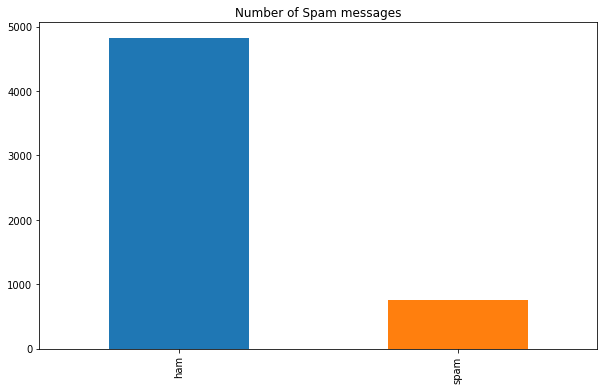

In [10]:
df.label.value_counts().plot(kind='bar',figsize=(10,6))
plt.title("Number of Spam messages")

C:\Users\DELL\Anaconda3\envs\nlp_course\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\DELL\Anaconda3\envs\nlp_course\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\DELL\Anaconda3\envs\nlp_course\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\DELL\Anaconda3\envs\nlp_course\lib\site-pack

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

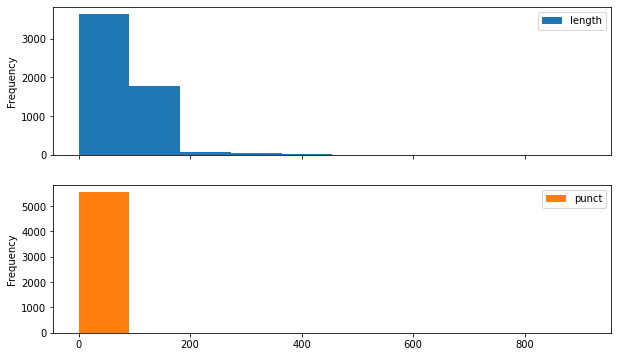

In [11]:
df.plot.hist(figsize=(10,6),subplots=True)

<font color='green'>Let's check the length parameter

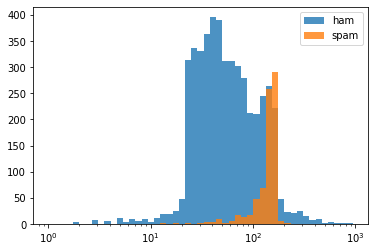

In [19]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

Let's check punct parameter in terms of spam and ham meassages

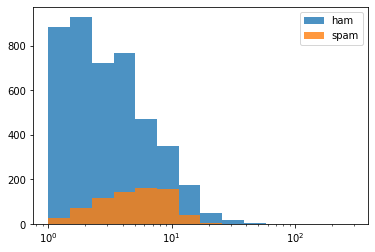

In [31]:
plt.xscale('log')
bins=1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()